In [1]:
import numpy as np
import matplotlib.pyplot as plt
import json
import pandas as pd
import tensorflow as tf

In [2]:
track_uri_to_track_name = json.load(open('track_uri_to_track_name.json'))
track_uri_to_artist_name = json.load(open('track_uri_to_artist_name.json'))
track_uri_to_album_name = json.load(open('track_uri_to_album_name.json'))


In [3]:
vocab = np.load('vocab.npy')
print(len(vocab))
vocab

100000


array(['', '[UNK]', 'spotify:track:7KXjTSCq5nL1LoYtL7XAwS', ...,
       'spotify:track:1U2AeCwozrN34CXgZtuvrw',
       'spotify:track:1TqRPYCC8EeC10UGtLFD6l',
       'spotify:track:1Tl9co6x62bqGt2USCYyx6'], dtype='<U36')

In [4]:
weights = np.load('weights.npy')
print(weights.shape)
weights

(100000, 100)


array([[-0.02773029, -0.00485823, -0.03701967, ..., -0.0056155 ,
         0.03191834,  0.04137988],
       [ 0.7589408 , -0.1665406 , -0.35163397, ..., -0.26469716,
        -1.203041  , -0.47629339],
       [-0.06784058, -0.2269461 ,  0.02120765, ..., -0.05897962,
        -0.27774864,  0.2549336 ],
       ...,
       [ 0.23867771,  0.02652628, -0.31786844, ..., -0.04547462,
        -0.45037833, -0.10036582],
       [ 0.02348454,  0.03681505, -0.01654822, ..., -0.01387602,
        -0.01852059,  0.03796215],
       [ 0.24130662,  0.24390751,  0.44962767, ...,  0.03664682,
         0.28830484, -0.08757178]], dtype=float32)

In [5]:
# create a pandas dataframe to store the weights 
df = pd.DataFrame(weights)
# add vocab as the first column
df.insert(0, 'vocab', vocab)


In [6]:
# add track name, artist name, and album name to the dataframe
df['track_name'] = df['vocab'].map(track_uri_to_track_name)
df['artist_name'] = df['vocab'].map(track_uri_to_artist_name)
df['album_name'] = df['vocab'].map(track_uri_to_album_name)

# change order of columns
df = df[['track_name', 'artist_name', 'album_name'] + list(df.columns[0:-3])]

df.head()

,track_name,artist_name,album_name,vocab,0,1,2,3,4,5,...,90,91,92,93,94,95,96,97,98,99
0,NaN,NaN,NaN,,-0.027730,-0.004858,-0.037020,0.034162,0.011547,-0.017200,...,0.000451,-0.018515,-0.015325,0.010739,0.001765,-0.003623,0.049730,-0.005615,0.031918,0.041380
1,NaN,NaN,NaN,[UNK],0.758941,-0.166541,-0.351634,0.711829,0.512050,0.265440,...,-0.427931,1.202294,0.253290,0.053725,0.112663,0.491084,1.223004,-0.264697,-1.203041,-0.476293
2,HUMBLE.,Kendrick Lamar,DAMN.,spotify:track:7KXjTSCq5nL1LoYtL7XAwS,-0.067841,-0.226946,0.021208,-0.000978,0.024122,0.811564,...,-0.154036,0.330119,0.239741,0.093737,0.002506,-0.199926,-0.424507,-0.058980,-0.277749,0.254934
3,One Dance,Drake,Views,spotify:track:1xznGGDReH1oQq0xzbwXa3,0.475803,0.272288,-0.026436,0.476450,-0.373729,0.177102,...,-0.056459,0.140651,-0.422694,0.157549,0.046260,0.281121,-0.244944,0.129222,0.574640,0.064421
4,Broccoli (feat. Lil Yachty),DRAM,Big Baby DRAM,spotify:track:7yyRTcZmCiyzzJlNzGC9Ol,-0.020667,0.042816,0.424955,-0.249146,-0.069751,-0.245494,...,0.113743,-0.234581,-0.044621,0.073647,-0.415964,-0.776098,-0.175981,0.056235,0.217864,0.175368


In [7]:
# take a random song by The Beatles
beatles = df[df['artist_name'] == 'The Beatles']
beatles = beatles[beatles['track_name'].str.startswith('Yesterday')]

index = np.random.randint(0, len(beatles))

title = beatles.iloc[index]['track_name']
artist = beatles.iloc[index]['artist_name']
album = beatles.iloc[index]['album_name']
uri = beatles.iloc[index]['vocab']
print(title, artist, album, uri)



Yesterday - Remastered The Beatles Help! spotify:track:1e0hllQ23AG0QGFgezgLOq


In [8]:
# find a song by My chemical romance
mcr = df[df['artist_name'] == 'My Chemical Romance']
# starts with Na na na
mcr = mcr[mcr['track_name'].str.startswith('Na Na Na')]
nanana_index = np.random.randint(0, len(mcr))

title = mcr.iloc[index]['track_name']
artist = mcr.iloc[index]['artist_name']
album = mcr.iloc[index]['album_name']
uri = mcr.iloc[index]['vocab']

print(title, artist, album, uri)

Na Na Na [Na Na Na Na Na Na Na Na Na] My Chemical Romance Danger Days: The True Lives Of The Fabulous Killjoys spotify:track:5BB0Jzw60KyfSTyjJqtely


In [9]:
# find a song by Danny Elfman
elfman = df[df['artist_name'] == 'Danny Elfman']
# title starts with beetlejuice
elfman = elfman[elfman['track_name'].str.startswith('Beetlejuice')]

beetlejuice_index = np.random.randint(0, len(elfman))

title = elfman.iloc[index]['track_name']
artist = elfman.iloc[index]['artist_name']
album = elfman.iloc[index]['album_name']
uri = elfman.iloc[index]['vocab']

print(title, artist, album, uri)

Beetlejuice - Main Titles / End Titles Danny Elfman Music For A Darkened Theatre Volume One spotify:track:3DF4z39U0NQeeRNgXDA7pT


In [10]:
nanana_vec = weights[nanana_index]
beetlejuice_vec = weights[beetlejuice_index]

summation = nanana_vec + beetlejuice_vec
summation = summation / np.linalg.norm(summation)

# find the closest  5 songs to the summation
cosine_similarities = np.dot(weights, summation) / (np.linalg.norm(weights, axis=1) * np.linalg.norm(summation))
closest = np.argsort(cosine_similarities)[::-1]
closest = closest[:5]

for i in closest:
    title = df.iloc[i]['track_name']
    artist = df.iloc[i]['artist_name']
    album = df.iloc[i]['album_name']
    uri = df.iloc[i]['vocab']
    print(title, artist, album, uri)
    


nan nan nan 
Baby Come On - Acoustic Version +44 When Your Heart Stops Beating spotify:track:55RhZm08vdt0HkkPIT6QZB
Milk N' Honey Anderson .Paak Venice spotify:track:72TpOdSgTcuE8IJ0xXz8T6
Nobody's Perfect J. Cole Cole World: The Sideline Story spotify:track:07NI6CCv57IbIqzy10ddd7
Feeling Low Will Reagan Tell All My Friends spotify:track:5uDPAOBTQuYQSqZaBeg9wm


In [11]:
# find the top 10 songs similar
def find_similar_songs(uri, weights, top_n=10):
    # find the index of the song
    index = np.where(vocab == uri)[0][0]
    # calculate the cosine similarity
    cosine_similarities = np.dot(weights, -weights[index]) / (np.linalg.norm(weights) * np.linalg.norm(weights[index]))
    # find the top_n similar songs
    top_n_similar_songs = np.argsort(cosine_similarities)[::-1][:top_n]
    return top_n_similar_songs

top_n_similar_songs = find_similar_songs(uri, weights)
for i, song in enumerate(top_n_similar_songs):
    print(f'{i+1}. {df.iloc[song]["track_name"]} - {df.iloc[song]["artist_name"]} - {df.iloc[song]["album_name"]}')


1. They Don't Love You No More - DJ Khaled - I Changed A Lot (Deluxe)
2. Bitches N Marijuana - Chris Brown - Fan of A Fan The Album (Deluxe Version)
3. Started From the Bottom - Drake - Nothing Was The Same
4. I Know How It Feel - Ace Hood - I Know How It Feel
5. Paradise - Radio Edit - Benny Benassi - Danceaholic
6. Ayo - Chris Brown - Fan of A Fan The Album (Deluxe Version)
7. Lockjaw - French Montana - Lockjaw
8. Bubblegum (feat. Tyga) - Jason Derulo - Talk Dirty
9. Where U Been? - 2 Chainz - B.O.A.T.S. II #METIME
10. Fight Night - Migos - No Label II


In [12]:
#  save  pd.DataFrame to a csv file
df.to_csv('data.csv', index=False)

In [13]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from tqdm import tqdm


0it [00:00, ?it/s]

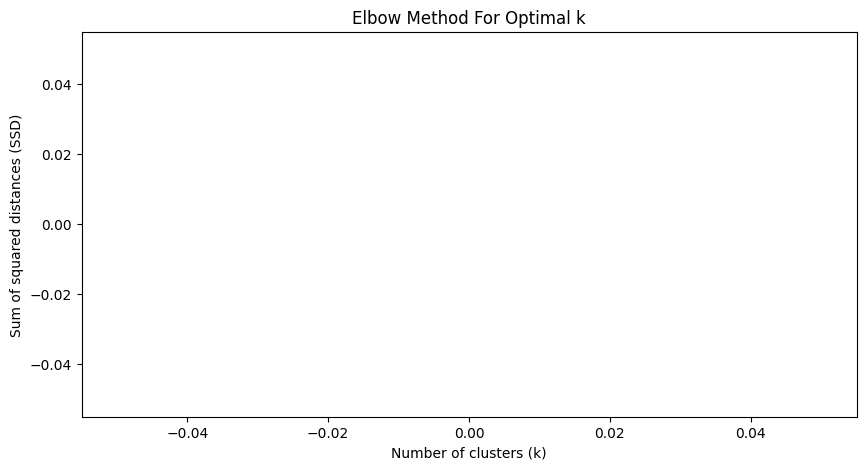

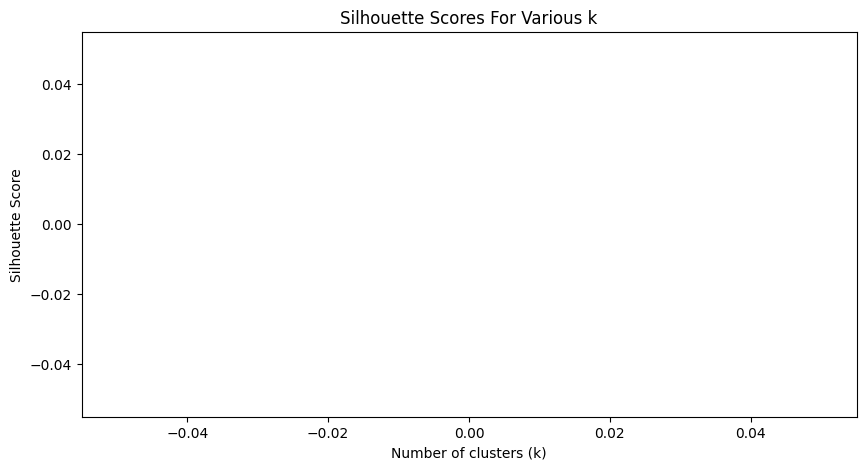

In [15]:

# Assuming 'df' is your DataFrame
data = df.iloc[:, 4:].values  # Adjust the index if needed to skip non-numeric columns

ssd = []
silhouette_scores = []

# Range of k values
k_range = range(1, 1)

for k in tqdm(k_range):
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(data)
    
    # Sum of squared distances
    ssd.append(kmeans.inertia_)
    
    # Silhouette score, not calculating for k = 1 as it's not defined
    if k > 1:
        silhouette_scores.append(silhouette_score(data, cluster_labels))
    else:
        silhouette_scores.append(None)

# Plotting SSD (Elbow Method)
plt.figure(figsize=(10, 5))
plt.plot(k_range, ssd, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of squared distances (SSD)')
plt.title('Elbow Method For Optimal k')
plt.show()

# Plotting Silhouette Scores
plt.figure(figsize=(10, 5))
plt.plot(k_range[1:], silhouette_scores[1:], 'ro-')  # skip the first entry as it's None
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores For Various k')
plt.show()


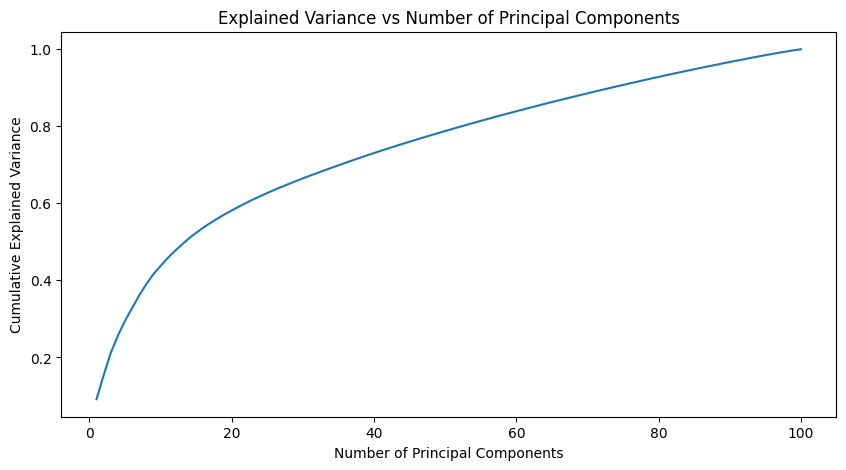

In [20]:
data = df.iloc[:, 4:].values  # Adjust the index if needed to skip non-numeric columns
# preform PCA
from sklearn.decomposition import PCA

max_pca_components = data.shape[1]
pca = PCA(n_components=max_pca_components)
pca.fit(data)
explained_variance = pca.explained_variance_ratio_

# plot the explained variance
plt.figure(figsize=(10, 5))
plt.plot(range(1, max_pca_components + 1), np.cumsum(explained_variance))
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs Number of Principal Components')
plt.show()


c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Preformed clustering


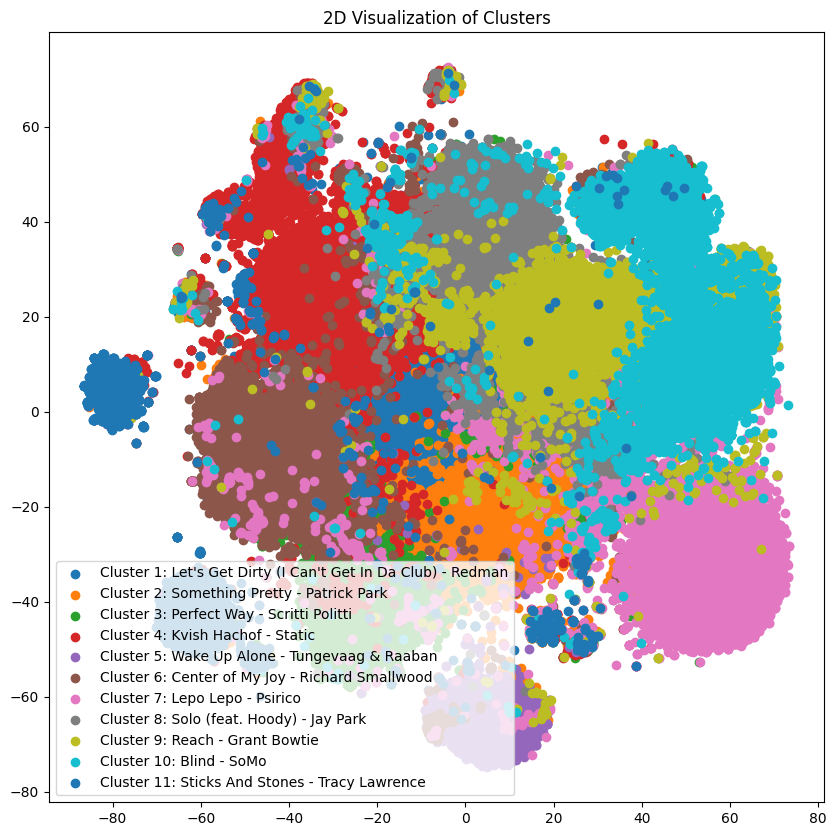

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np

if False:
    # Assuming 'df' is your DataFrame and 'optimal_k' is your chosen number of clusters
    data = df.iloc[:, 4:].values  # Adjust as necessary for your dataset

    # find the average point 
    average_point = np.mean(data, axis=0)
    # delete all points that are, in respect to the distance from the average, in the top 2.5%
    data = data[np.linalg.norm(data - average_point, axis=1) < np.percentile(np.linalg.norm(data - average_point, axis=1), 95)]

    # Step 1: Clustering
    kmeans = KMeans(n_clusters=11, random_state=42)
    clusters = kmeans.fit_predict(data)

    print("Preformed clustering")

    # Finding representative points for each cluster
    centroids = kmeans.cluster_centers_
    representative_idx = np.argmin(np.linalg.norm(data[:, np.newaxis] - centroids, axis=2), axis=0)

    # Labels for each cluster
    cluster_labels = [f"Cluster {i+1} - Representative index: {idx}" for i, idx in enumerate(representative_idx)]

    # Step 2: 2D Visualization
    tsne = TSNE(n_components=2, random_state=42)
    data_2d = tsne.fit_transform(data)

    # Plotting
    plt.figure(figsize=(10, 10))
    for i in range(11):
        label = f"Cluster {i+1}: {df.iloc[representative_idx[i]]['track_name']} - {df.iloc[representative_idx[i]]['artist_name']}"
        plt.scatter(data_2d[clusters == i, 0], data_2d[clusters == i, 1], label=label)

    plt.title('2D Visualization of Clusters')
    plt.legend()
    plt.show()


c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
  0%|          | 0/180 [00:00<?, ?it/s]C:\Users\sevcn\AppData\Local\Temp\ipykernel_16056\864060246.py:52: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  frames.append(imageio.imread(filename))
100%|██████████| 180/180 [02:14<00:00,  1.33it/s]
C:\Users\sevcn\AppData\Local\Temp\ipykernel_16056\864060246.py:60: DeprecationWarning: remove: path should be string, bytes or os.PathLike, not ndarray
  os.remove(frame)


ValueError: remove: embedded null character in path

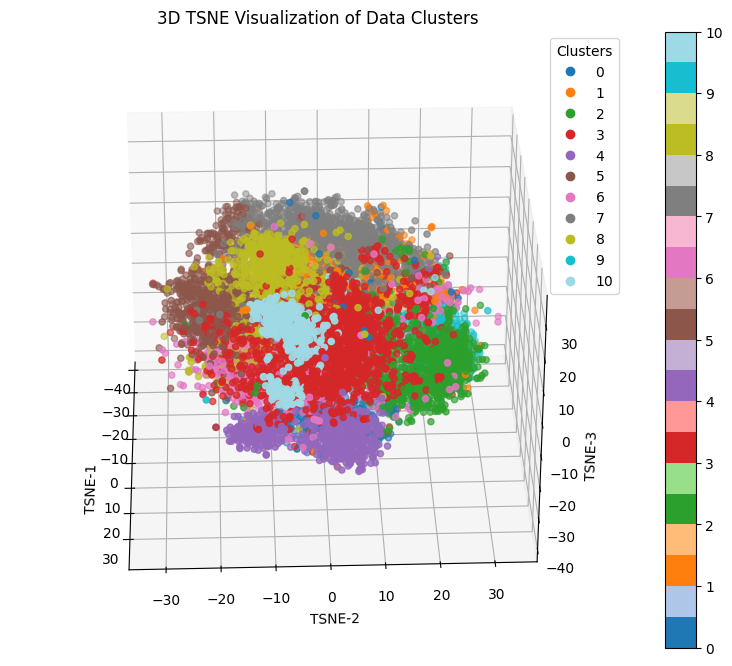

In [24]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import imageio

# Assuming 'df' is your DataFrame and 'optimal_k' is your chosen number of clusters
data = df.iloc[:, 4:].values  # Adjust as necessary for your dataset

# find the average point 
average_point = np.mean(data, axis=0)
# delete all points that are, in respect to the distance from the average, in the top 2.5%
data = data[np.linalg.norm(data - average_point, axis=1) < np.percentile(np.linalg.norm(data - average_point, axis=1), 95)]

# shuffle the data
np.random.shuffle(data)
# keep 15% of the data
data = data[:int(0.105 * len(data))]


# Step 1: Clustering
kmeans = KMeans(n_clusters=11, random_state=42)
clusters = kmeans.fit_predict(data)

# Step 2: 3D Visualization using t-SNE
tsne = TSNE(n_components=3, random_state=42)
data_3d = tsne.fit_transform(data)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
# choce a color map that has 11 and the color of the clusters is distinct

scatter = ax.scatter(data_3d[:, 0], data_3d[:, 1], data_3d[:, 2], c=clusters, depthshade=True, cmap='tab20')
plt.colorbar(scatter, ax=ax, ticks=range(11))
ax.set_title('3D TSNE Visualization of Data Clusters')
ax.set_xlabel('TSNE-1')
ax.set_ylabel('TSNE-2')
ax.set_zlabel('TSNE-3')
# add legend
plt.legend(*scatter.legend_elements(), title='Clusters')

# Create a GIF
frames = []
for angle in tqdm(range(0, 360, 2)):
    ax.view_init(30, angle)
    filename = f'frame{angle}.png'
    plt.savefig(filename)
    frames.append(imageio.imread(filename))

# Save to GIF
imageio.mimsave('cluster_3d_tsne.gif', frames, fps=10)

# Clean up frames
import os
for frame in frames:
    os.remove(frame)
